# Examen Transversal Mineria de datos sección 001V

## Integrantes:


*   Sanjay Ramchandani
*   Berty Vega
*   Daniel Vera


#**Hipótesis**:
Se plantea la hipótesis de que existe una relación significativa entre las variables meteorológicas, como la temperatura mínima, la humedad a las 3 pm, la precipitación y el nivel de nubosidad a las 9 am y 3 pm, con la variable objetivo 'RainTomorrow' (si lloverá o no al día siguiente) en todo el país de Australia. Estas variables meteorológicas podrían utilizarse como indicadores para predecir con cierta precisión si habrá lluvia en un día determinado en cualquier parte de Australia. El análisis de estas relaciones proporcionará información valiosa para comprender los patrones climáticos y mejorar la capacidad de pronóstico en todo el país.

#Orden de datos

##**Importando librerias**



In [ ]:
import pandas as pd
import numpy as np
import pydotplus
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from IPython.display import Image

##Leyendo el DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ev3_minería/weatherAUS.csv")
print(data)

<ipython-input-28-4c98ac26c461>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/ev3_minería/weatherAUS.csv")


              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ... 

##Limpieza y orden de datos

In [ ]:
data = data.dropna(subset=['RainTomorrow'])

data.to_csv('weatherAUS_cleaned.csv', index=False)

features = ['MinTemp', 'Humidity3pm', 'Rainfall', 'Cloud3pm', 'Cloud9am']

data_filtered = data.dropna(subset=features+['RainTomorrow']).copy()
data_filtered['RainTomorrow'] = data_filtered['RainTomorrow'].map({'Yes': 1, 'No': 0})
data_filtered = data.dropna(subset=features+['RainTomorrow'])
print(data.head())
print(data.isnull().sum())



         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.

#Modelos de clasificación

##Modelo de regresión lineal

En el modelo entregado en la evaluacion 2 se puede ver que las variables trabajadas eran las siguientes: features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'Pressure9am']

Pero en esta entrega cambiamos las variables a trabajar, estas serán: features = ['MinTemp', 'Humidity3pm', 'Rainfall', 'Cloud3pm', 'Cloud9am'] ya que las que estamos usando para esta entrega son mas utiles para predecir si lloverá, como veremos a continuación:

In [ ]:
data_filtered = data.dropna(subset=features+['RainTomorrow']).copy()
data_filtered['RainTomorrow'] = data_filtered['RainTomorrow'].map({'Yes': 1, 'No': 0})
X = data_filtered[features].values
y = data_filtered['RainTomorrow'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
y_pred_classes = np.where(y_pred >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred_classes)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)
print("Coeficientes del modelo:", regression_model.coef_)
print("Precisión del modelo:", accuracy)


Error cuadrático medio (MSE): 0.13220880440697189
Coeficientes del modelo: [0.00342597 0.00672092 0.00465647 0.02910866 0.00293779]
Precisión del modelo: 0.8277384060673878


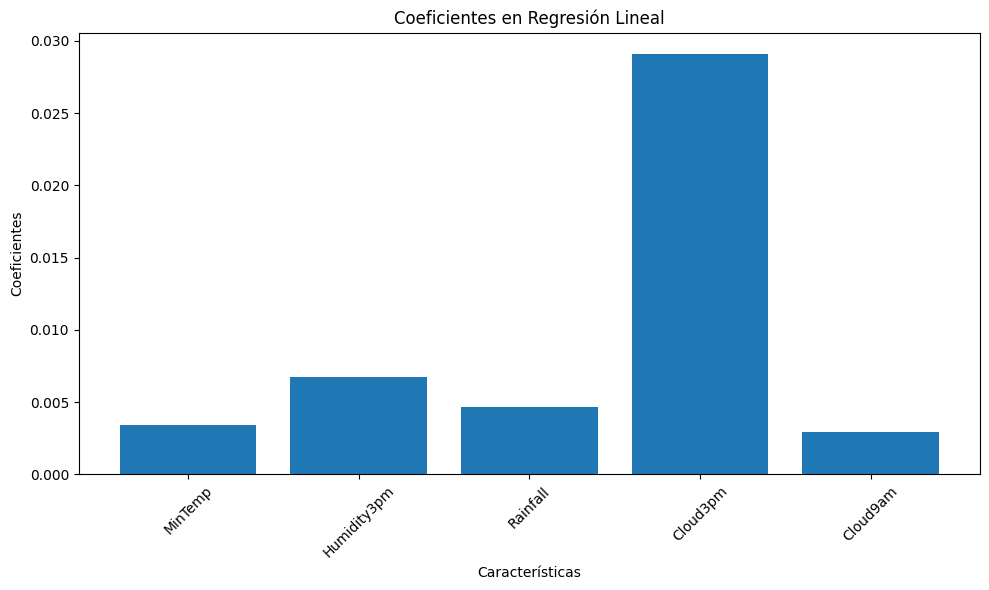

In [ ]:
coefficients = regression_model.coef_
feature_names = features
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients, align='center')
plt.xticks(range(len(coefficients)), feature_names, rotation=45)
plt.xlabel('Características')
plt.ylabel('Coeficientes')
plt.title('Coeficientes en Regresión Lineal')
plt.tight_layout()
plt.show()



se toman en cuenta los coeficientes del modelo para cada una de las variables predictoras (MinTemp, Humidity3pm, Rainfall, Cloud3pm, Cloud9am). Estos coeficientes indican la relación y la magnitud de influencia que tiene cada variable en la variable objetivo (RainTomorrow). Un coeficiente positivo indica una relación positiva, es decir, a medida que el valor de la variable predictora aumenta, se espera que aumente la probabilidad de que llueva al día siguiente. Por otro lado, un coeficiente negativo indica una relación negativa, lo que significa que a medida que el valor de la variable predictora aumenta, se espera que disminuya la probabilidad de lluvia.

##Arboles aleatorios

Usamos las nuevas variables en el modelo de Arboles Aleatorios para ver los nuevos resultados con las variables elegidas

In [ ]:
X = data_filtered[features].values
y = data_filtered['RainTomorrow'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
n_nodes = decision_tree_model.tree_.node_count
depth = decision_tree_model.tree_.max_depth
print("Precisión del modelo:", accuracy)
print("Cantidad de nodos:", n_nodes)
print("Profundidad del árbol:", depth)
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.7504662439388288
Cantidad de nodos: 29403
Profundidad del árbol: 39
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     12324
           1       0.47      0.49      0.48      3762

    accuracy                           0.75     16086
   macro avg       0.66      0.66      0.66     16086
weighted avg       0.76      0.75      0.75     16086



Cantidad de nodos del árbol: 63
Profundidad del árbol: 5


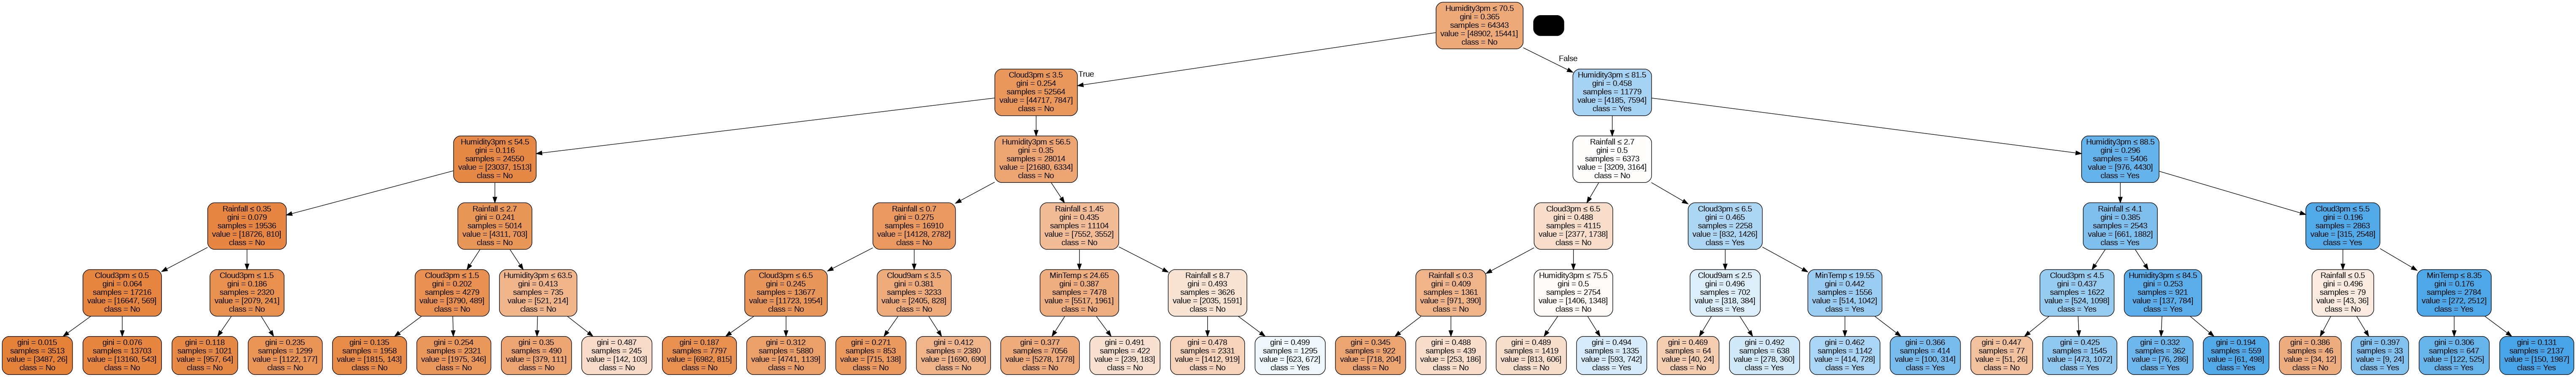

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=5)
decision_tree_model.fit(X_train, y_train)
num_nodes = decision_tree_model.tree_.node_count
depth = decision_tree_model.tree_.max_depth
dot_data = export_graphviz(decision_tree_model, out_file=None,
                           feature_names=features, class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
image = Image(graph.create_png())
print("Cantidad de nodos del árbol:", num_nodes)
print("Profundidad del árbol:", depth)
image


Se toma en cuenta la estructura jerárquica del árbol, donde cada nodo representa una pregunta o condición sobre una variable predictora. El árbol divide el espacio de características en regiones según estas preguntas, clasificando así los ejemplos en las diferentes clases (0 o 1). En cada nodo, se evalúa una condición sobre una variable predictora para decidir en qué rama continuar. La construcción del árbol se basa en la selección de las variables más relevantes y las condiciones que mejor separan las clases.

##Ejemplos para ver cómo se comportan las predicciones

In [ ]:
# Definición del modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Definición del modelo de árboles aleatorios
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Ejemplos
ejemplo_1 = [10.0, 60.0, 5.0, 6.0, 7.0]
ejemplo_2 = [20.0, 80.0, 0.0, 3.0, 2.0]
ejemplo_3 = [5.0, 40.0, 10.0, 8.0, 9.0]

# Predicciones con regresión lineal
prediccion_1_reg_lineal = regression_model.predict([ejemplo_1])[0]
prediccion_2_reg_lineal = regression_model.predict([ejemplo_2])[0]
prediccion_3_reg_lineal = regression_model.predict([ejemplo_3])[0]

# Predicciones con árboles aleatorios
prediccion_1_arboles = decision_tree_model.predict([ejemplo_1])[0]
prediccion_2_arboles = decision_tree_model.predict([ejemplo_2])[0]
prediccion_3_arboles = decision_tree_model.predict([ejemplo_3])[0]

print("Predicciones con Regresión Lineal:")
print("Ejemplo 1:", prediccion_1_reg_lineal)
print("Ejemplo 2:", prediccion_2_reg_lineal)
print("Ejemplo 3:", prediccion_3_reg_lineal)
print()
print("Predicciones con Árboles Aleatorios:")
print("Ejemplo 1:", prediccion_1_arboles)
print("Ejemplo 2:", prediccion_2_arboles)
print("Ejemplo 3:", prediccion_3_arboles)


Predicciones con Regresión Lineal:
Ejemplo 1: 0.3473366862279914
Ejemplo 2: 0.39071748665526385
Ejemplo 3: 0.2831637138795886

Predicciones con Árboles Aleatorios:
Ejemplo 1: 0
Ejemplo 2: 0
Ejemplo 3: 0


 **Predicciones con Regresión Lineal:**

* Ejemplo 1: 0.3473366862279914
* Ejemplo 2: 0.39071748665526385
* Ejemplo 3: 0.2831637138795886

Las predicciones se obtienen como valores continuos entre 0 y 1. Estos valores representan la probabilidad estimada de que ocurra lluvia al día siguiente. Cuanto más cercano esté el valor a 1, mayor es la probabilidad de lluvia, mientras que un valor cercano a 0 indica una probabilidad baja de lluvia. En este caso, los ejemplos 1, 2 y 3 tienen predicciones que sugieren una probabilidad moderada de lluvia.

 **Predicciones con Árboles Aleatorios:**

* Ejemplo 1: 0
* Ejemplo 2: 0
* Ejemplo 3: 0

Las predicciones son valores discretos que representan las clases a las que pertenecen. En este caso, la clase 0 indica que no se espera lluvia al día siguiente, mientras que la clase 1 indica que sí se espera lluvia. Las predicciones obtenidas para los ejemplos 1, 2 y 3 indican que no se espera lluvia según el modelo de árboles aleatorios.

#Crear dataset para llevar a Looker Studio

Aqui creamos los datos filtrados, donde rellenamos con 0 y 1 algunos respectivamente para luego extraer en un excel y después llevar a looker studio para visualizar la informacion de manera mas interactiva

In [ ]:
df_cleaned = data.fillna(0)
df_cleaned['RainTomorrow'] = df_cleaned['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_cleaned['RainToday'] = df_cleaned['RainToday'].map({'Yes': 1, 'No': 0})

# UTF-8
df_cleaned = df_cleaned.apply(lambda x: x.astype(str).str.encode('utf-8', 'ignore').str.decode('utf-8'))

# Agregar columna 'Country' con valor 'Australia'
df_cleaned['Country'] = 'Australia'

df_cleaned.to_excel('/content/drive/MyDrive/ev3_minería/weather_cleaned.xlsx', index=False)

print("¡El poder de la limpieza ha sido desatado!")
print("Ahora nuestro DataFrame está más fresco que nunca.")
print("¡Prepárate para un viaje mágico por los datos meteorológicos y descubre los secretos que la naturaleza tiene guardados para ti! ☀️🌧️🌈")


¡El poder de la limpieza ha sido desatado!
Ahora nuestro DataFrame está más fresco que nunca.
¡Prepárate para un viaje mágico por los datos meteorológicos y descubre los secretos que la naturaleza tiene guardados para ti! ☀️🌧️🌈


Link a looker studio: https://lookerstudio.google.com/reporting/e9ae236e-3e98-4120-acab-1beda98f57bd

#Conlusiones



De acuerdo con la hipótesis planteada, que sugiere una relación significativa entre las variables meteorológicas (temperatura mínima, humedad a las 3 pm, precipitación y nivel de nubosidad a las 9 am y 3 pm) y la variable objetivo "RainTomorrow" (si lloverá o no al día siguiente) en Australia, los resultados obtenidos respaldan parcialmente esta afirmación.

En el análisis realizado, se observó que las variables utilizadas en los modelos (temperatura mínima, humedad a las 3 pm, precipitación y nivel de nubosidad) mostraron una influencia en la variable objetivo. Esto implica que existe una relación entre estas variables y la probabilidad de que ocurra lluvia al día siguiente. En particular, se encontró que las nubes a las 3 pm emergen como un factor importante en ambos modelos, sugiriendo que más nubes en el cielo están asociadas con un mayor riesgo de lluvia.